In [ ]:
import numpy as np
import random
 
class Config:
    CITIES = (("Bordeaux", (44.833333,-0.566667)), ("Paris",(48.8566969,2.3514616)),("Nice",(43.7009358,7.2683912)), ("Lyon",(45.7578137,4.8320114)),("Nantes",(47.2186371,-1.5541362)),("Brest",(48.4,-4.483333)),("Lille",(50.633333,3.066667)), ("Clermont-Ferrand",(45.783333,3.083333)),("Strasbourg",(48.583333,7.75)),("Poitiers",(46.583333,0.333333)), ("Angers",(47.466667,-0.55)),("Montpellier",(43.6,3.883333)),("Caen",(49.183333,-0.35)),("Rennes",(48.083333,-1.683333)),("Pau",(43.3,-0.366667)))
    CITIES_LEN = len(CITIES)
    pheromones = {}
 
    def __init__(self, A=1, B=1, Y=0, Q=1, EPS=.1, evaporation=.1):
        self.A = A
        self.B = B
        self.Y = Y
        self.Q = Q
        self.EPS = EPS
        self.evaporation = evaporation
        for i in range(self.CITIES_LEN):
            for j in range(self.CITIES_LEN):
               self.pheromones[(i,j)] = self.Q
 
    def distance(self, a,b):
        (v1,(x1,y1)), (v2,(x2,y2)) = (self.CITIES[a],self.CITIES[b])
        return np.sqrt((x1-x2)**2+(y1-y2)**2)

In [ ]:
class Fourmi:
    pathLength = 0
    visited = []

    def __init__(self):
        '''Start at Bordeaux'''
        self.visited = [0]
        self.pathLength = 0

    def constructPath(self):
        global config
        self.visited = [0]
        self.pathLength = 0
        while len(self.visited) < config.CITIES_LEN:
            self.visited.append(self._nextCity())
            self.pathLength += config.distance(self.visited[-2], self.visited[-1])
        self.visited.append(0)
        self.pathLength += config.distance(self.visited[-2], self.visited[-1])

    def deposePheromones(self):
        global config
        for i in range(1, len(self.visited)):
            config.pheromones[(self.visited[i-1],self.visited[i])] += config.Q/self.pathLength

    def _nextCity(self):
        global config
        i = self.visited[-1]
        allowed = []
        proba = []
        for k in range(config.CITIES_LEN):
            if (k in self.visited):
                continue
            allowed.append(k)
        pre_calc = 0
        for k in allowed:
            pre_calc += ((config.pheromones[(i, k)])**config.A) * ((1/config.distance(i, k))**config.B) + config.Y
        for j in allowed:
            proba.append( ( ((config.pheromones[(i, j)])**config.A) * ((1/config.distance(i, j))**config.B) + config.Y ) / pre_calc )
        if np.random.random() < config.EPS:
            return allowed[np.argmax(proba)]
        else:
          return random.choices(allowed, weights=proba)[0]

In [ ]:
class Colonie():
    _fourmis = []
    _colonieSize = None

    def __init__(self, colonieSize):
        self._colonieSize = colonieSize
        for i in range(self._colonieSize):
            self._fourmis.append(Fourmi())

    def oneIteration(self):
        global config
        for f in self._fourmis:
            f.constructPath()
        for f in self._fourmis:
            f.deposePheromones()
        # intensify best path (faster convergence)
        m,f = self.bestPath()
        for i in range(1, len(f.visited)):
            config.pheromones[(f.visited[i-1],f.visited[i])] += config.Q
        '''Pheromones evaporation'''
        for r in config.pheromones:
            config.pheromones[r] *= (1 - config.evaporation)

    def bestPath(self):
        minn = None
        f = None
        for i in self._fourmis:
            #print(i.pathLength, " : ", i.visited)
            if (minn is None) or (i.pathLength < minn):
                minn = i.pathLength
                f = i
        return minn, f

Iteration ::  0 / BEST ::  53.54747490756563
Iteration ::  1 / BEST ::  49.4882566891855
Iteration ::  2 / BEST ::  53.020362190169024
Iteration ::  3 / BEST ::  51.06051820128211
Iteration ::  4 / BEST ::  54.477592567471376
Iteration ::  5 / BEST ::  54.505670265065284
Iteration ::  6 / BEST ::  49.4373390672048
Iteration ::  7 / BEST ::  49.64005503393406
Iteration ::  8 / BEST ::  50.62426002653227
Iteration ::  9 / BEST ::  44.83668118719429
Iteration ::  10 / BEST ::  42.09433965819282
Iteration ::  11 / BEST ::  47.003640292639915
Iteration ::  12 / BEST ::  51.189418690629445
Iteration ::  13 / BEST ::  43.761040693585784
Iteration ::  14 / BEST ::  45.49356730327132
Iteration ::  15 / BEST ::  44.541517066716885
Iteration ::  16 / BEST ::  45.897651750775864
Iteration ::  17 / BEST ::  42.487115438464414
Iteration ::  18 / BEST ::  47.997398687349246
Iteration ::  19 / BEST ::  43.139078792817664
Iteration ::  20 / BEST ::  41.3833628359386
Iteration ::  21 / BEST ::  41.38336

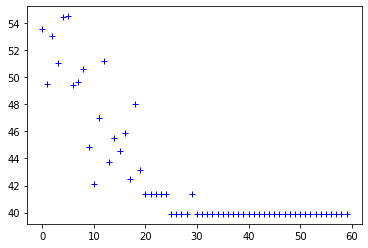

In [ ]:
import matplotlib.pyplot as plt

config = Config(A=1, B=1, Y=0, Q=2)
colonie = Colonie(10)
Y1 = []
for i in range(60):
    colonie.oneIteration()
    R, _ = colonie.bestPath()
    Y1 += [R]
    print ("Iteration :: ", i, "/ BEST :: ", R)
colonie.bestPath()
plt.plot(range(len(Y1)), Y1, 'b+')
plt.show()
plt.close()